# Capturing Groups

**Use parentheses to capture groups which are portions of the pattern that are enclosed in parentheses**

**Let's say that we have a list of people's full names. These names are stored as last name, comma, first name. We want to turn this around and create a string that starts with the first name followed by the last name.**

In [1]:
import re
result = re.search(r"^(\w*), (\w*)$", "Lovelace, Ada")
print(result)

print(result.groups())  # Because we defined two separate groups, the group method returns a tuple of two elements
print(result[0])
print(result[1])
print(result[2])
print(f"{result[2]} {result[1]}")

<re.Match object; span=(0, 13), match='Lovelace, Ada'>
('Lovelace', 'Ada')
Lovelace, Ada
Lovelace
Ada
Ada Lovelace


**Let's put this into a function that would do the rearranging for us. We'll start by defining a function called rearrange_name, that receives a name by parameter.**

In [2]:
def rearrange_name(name):
    result = re.search(r"^(\w*), (\w*)$", name)
    
    if result is None:
        return name
    return f"{result[2]} {result[1]}"

print(rearrange_name("Lovelace, Ada"))
print(rearrange_name("Ritchie, Dennis"))
print(rearrange_name("Hopper, Grace M."))  # Didn't match because we used the \w character, which only matches letters.

Ada Lovelace
Dennis Ritchie
Hopper, Grace M.


**So we can modify what we need to do here is add the extra characters that we want to allow in the names. In this example we'd want to add spaces and dots**

In [10]:
def rearrange_name(name):
    result = re.search(r"^([\w \.-]*), ([\w \.-]*)$", name)
    
    if result is None:
        return name
    return f"{result[2]} {result[1]}"

print(rearrange_name("Hopper, Grace M."))
print(rearrange_name("Kennedy, John F."))

Grace M. Hopper
John F. Kennedy


# More on Repetition Qualifiers

**To match any string of exactly five letters**

In [20]:
print(re.search(r"[a-zA-Z]{5}", "a scary ghost appeared"))  # Only find the 1st one
print(re.findall(r"[a-zA-Z]{5}", "a scary ghost appeared")) # Words more than 5 letters will still capture

<re.Match object; span=(2, 7), match='scary'>
['scary', 'ghost', 'appea']
['scary', 'ghost']


**What if we wanted to match all the words that are exactly five letters long? We can do that using \b, which matches word limits at the beginning and end of the pattern, to indicate that we want full words,**

In [21]:
print(re.findall(r"\b[a-zA-Z]{5}\b", "a scary ghost appeared")) 

['scary', 'ghost']


**If we wanted to match a range of 5 to 10 letters or numbers**|
* Note: "5,10". 5 comma follow by 10 cannot with space in between them like this > "5, 10"

In [29]:
print(re.findall(r"\w{5,10}", "I really like strawberries"))  
print(re.findall(r"\w{5,}", "I really like strawberries"))   # The ranges can also be open ended, means at least /
                                                             # that many repetitions with no upper boundary limited /
                             c                                # only by the maximum repetitions in the source text.

['really', 'strawberri']
['really', 'strawberries']


In [37]:
print(re.findall(r"s\w{,20}", "I really like strawberries"))  # S followed by up to 20 alphanumeric characters. So we /
                                                              # got a match for strawberries which starts with S, and /
                                                              # is followed by 11 characters

['strawberries']


**The long_words function returns all words that are at least 7 characters.**

In [40]:
def long_words(text):
    pattern = r"\w{7,}"
    result = re.findall(pattern, text)
    return result

print(long_words("I like to drink coffee in the morning.")) # ['morning']
print(long_words("I also have a taste for hot chocolate in the afternoon.")) # ['chocolate', 'afternoon']
print(long_words("I never drink tea late at night.")) # []

['morning']
['chocolate', 'afternoon']
[]


# Extracting a PID Using regexes in Python

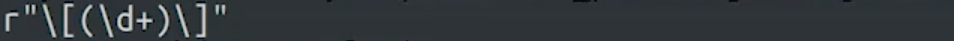

**The first character of the pattern is the backslash, which is used as the escape character. This means that the next character, which is an open square bracket, is treated literally for matching purposes.<br>
Since it isn't escaped, we know it'll be used as a capturing group. The capturing group parentheses are wrapping the backslash d+ symbols.<br>
From special characters and repetition qualifiers, we know that this expression will match one or more numerical characters. After the closing parentheses of the capturing group, we have the closing square bracket symbol, also proceeded by the escape character.**

In [4]:
log = "July 31 07:51:48 mycomputer bad_process[12345]: ERROR Performing package upgrade"
regex = r"\[(\d+)\]"
result = re.search(regex, log)

print(result[1])  # Because we're capturing groups in an expression, we can access the matching data by accessing 
                  # the value at index 1

12345


**Let's try our expression on a different string and check that it really works, no matter what the rest of the text is.**

In [5]:
result = re.search(regex, "A completely different string that also has numbers [34567]")
print(result[1])

34567


**But what if our string didn't actually have a block of numbers between the square brackets?**
* We tried to access the index 1 of a variable that was none. As Python tells us, this isn't something that we can do.

In [7]:
result = re.search(regex, "99 elephants in a [cage]")
print(result[0])  # Return None

TypeError: 'NoneType' object is not subscriptable

**We should have a function that extracts the process ID or PID when possible, and does something else if not.**
* will start by defining a function called extract_pid.

In [13]:
def extract_pid(log_line):
    regex = r"\[(\d+)\]"
    result = re.search(regex, log_line)
    
    if result is None:  # We know that if the search wasn't successful the result will be none.
        return ""       # Let's say that if we couldn't find the PID, we'll return an empty string
    return result[1]    # If we're at this point, it means the result is a match object. So we can access the /
                        # first capturing group and return that.

print(extract_pid(log))
print(extract_pid("99 elephants in a [cage]"))  # This didn't match and return empty string

12345



**Add to the regular expression used in the extract_pid function above cell, to return the uppercase message in parenthesis, after the process id.**

In [16]:
def extract_pid(log_line):
    regex = r"\[(\d+)\]\: (\w+)"
    result = re.search(regex, log_line)
    if result is None:
        return None
    return f"{result[1]} ({result[2]})"

print(extract_pid("July 31 07:51:48 mycomputer bad_process[12345]: ERROR Performing package upgrade")) # 12345 (ERROR)
print(extract_pid("99 elephants in a [cage]")) # None
print(extract_pid("A string that also has numbers [34567] but no uppercase message")) # None
print(extract_pid("July 31 08:08:08 mycomputer new_process[67890]: RUNNING Performing backup")) # 67890 (RUNNING)


12345 (ERROR)
None
None
67890 (RUNNING)


# Splitting and Replacing

**re.split() in Regular Expression works similarly to the Python's split() function but split() only can split one punctuation (if without importing other modules like re or string.punctuation) at a time**

In [30]:
re.split(r"[.?!]", "One sentence. Another one? And the last one!")

['One sentence', ' Another one', ' And the last one', '']

**If we want our split list to include the elements that we're using to split the values we can use capturing parentheses**

In [31]:
re.split(r"([.?!])", "One sentence. Another one? And the last one!")  # Just add the parentheses for the character class

['One sentence', '.', ' Another one', '?', ' And the last one', '!', '']

**re.sub() used for creating new strings by substituting all or part of them for a different string, similar to the replace string method but using regular expressions for both the matching and the replacing.**
* For example, we had some logs in our system that included e-mail addresses of users and we wanted to anonymize the data by removing all the addresses.

In [32]:
print(re.sub(r"[\w.%+-]+@[\w.-]+", "[REDACTED]", "Received an email for go_nuts95@my.example.com"))

Received an email for [REDACTED]


**We can also switch the order of last names and first names of people and use re.sub() to create the new string**

In [38]:
print(re.sub(r"^([\w .-]*), ([\w .-]*)$", r"\2 \1", "Lovelace, Ada"))
print(re.sub(r"^([\w .-]*), ([\w .-]*)$", r"\2 \1", "George, H. W. Bush"))

Ada Lovelace
H. W. Bush George
